In [795]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1. Reading and Understanding data

In [796]:
#Importing dataset
leads = pd.read_csv('Leads.csv')

In [797]:
#checking dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- We see a lot of values as 'select' in various columns. This means there are people who visited the website but didn't filled some of the questions asked in the questionnaire. These 'select' values are as good as null values.

- We will convert all the 'select' values 

### Inspecting various aspect of the 'leads' dataset

In [798]:
# checking shape of the dataframe
leads.shape

(9240, 37)

- The dataframe contains 9240 rows and 37 columns

In [799]:
# checking statistical details of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- We see a lot of outliers present in the data, expecially on columns such as 'Converted'and 'Total Time Spent on Website'

In [800]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- We can see a lot of null values present across many columns. We need to check the null percentage of each column and either impute missing values or drop certain columns

### Step 2. Data cleaning

In [801]:
# converting 'select' values to null values
leads = leads.replace('Select',np.nan)

In [802]:
# checking head of dataframe again
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [803]:
leads.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

We will go ahead and drop few columns from the dataframe before further analysis:
1. Lead number: As we already have Prospect ID so we don't need it
2. Do  not Email
3. Do not Call
4. Search
5. Magazine
6. Newspaper Article
7. X Education Forums
8. Newspaper
9. Digital Advertisement
10. Through Recommendations
11. Receive More Updates About Our Courses
12. Update me on Supply Chain Content
13. Get updates on DM Content
14. I agree to pay the amount through cheque
15. A free copy of Mastering The Interview
16. Last Notable Activity: We alraedy have 'Last Activity'column
17. Country: We cant convert it into dummy variables

- For variables from sl. no. 2-15, the maximum occuring value is 'No'. So these will not provide any insights to our analysis

In [804]:
leads = leads.drop(['Lead Number','Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview','Last Notable Activity','Country'],1)

In [805]:
#re-checking dataframe shape
leads.shape

(9240, 20)

In [806]:
# Checking null percentage of the columns 
((leads.isnull() | leads.isna()).sum() * 100 / leads.index.size).round(2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Converted 

- We see many columns having null percentage greater than 40%. We can drop these columns 

In [807]:
# Dropping off columns having null percentage greater than 40% 
leads = leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                            'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [808]:
# Checking null percentages again after removing columns containing null percentage greater than 40%
((leads.isnull() | leads.isna()).sum() * 100 / leads.index.size).round(2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Lead Origin                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
dtype: float64

#### Missing value treatment

- For categorical variable: will use mode for imputing missing values
- For numerical variables: will use either mean or median depending on presence of outliers and data distribution skewness 

#### 'City' Column

In [809]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- Since the occurence of 'Mumbai' is higher , we will impute the missing values with 'Mumbai'


In [810]:
leads['City'].fillna('Mumbai', inplace = True)

#### 'Specialization' Column

In [811]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

- Even if we see that 'Finance Management' occured most of the time but we can't be certain and impute the missing values with the same as there could be situation where the client couldn't found a his/her suitable industry domain.
- Here, we can create a seperate label and give it a name.


In [812]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [813]:
# re-checking specialization column
leads['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### 'Tags' Column

In [814]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

- Imputing missing value with 'Will revert after reading the email' as it has the maximum occurence

In [815]:
leads['Tags'].fillna('Will revert after reading the email', inplace = True)

#### 'What matters most to you in choosing a course' Column

In [816]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Imputing missing values of the above column with value 'Better Career Prospects'

In [817]:
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

#### 'What is your current occupation' Column

In [818]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Imputing missing values of the above column with value 'Umemployed'

In [819]:
leads['What is your current occupation'].fillna('Unemployed', inplace = True)

- We see that there are still very few null values ( 1% or lesser than 1% ) so we can drop those rows that have null values as it won't be changing significant part of our dataframe

In [820]:
# Dropping rows in the dataframe having null values
leads.dropna(inplace=True)

In [821]:
# Re-checking null percentage of all columns for a sanity check
((leads.isnull() | leads.isna()).sum() * 100 / leads.index.size).round(2).sort_values(ascending = False)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
dtype: float64

- Now we see that our dataframe doesn't contain any null values. We can procees to the next step of data analysis.

### Checking for other errors in numerical columns of the dataframe

- We will only be checking the numerical columns as they might contain:

    - special characters
    - currency abbreviations
    - negative sign
- As far as categorical columns are concerned , we have already imputed the missing values with apt. method of both the dataframes

In [822]:
leads.loc[:,leads.dtypes != np.object].head(10)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0
5,0,0.0,0,0.0
6,1,2.0,1640,2.0
7,0,0.0,0,0.0
8,0,2.0,71,2.0
9,0,4.0,58,4.0


- We see the format of the numerical columns are okay 

In [823]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

- From all the above columns, we can tell that 'Converted' is our target variable given the problem statement of this study.
- We can check for data imbalance using this variable.
- '0' denotes Not-converted and '1' denotes Converted

### Step 3: Exploratory Data Analysis

#### Checking data imbalance

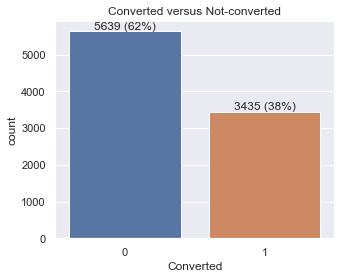

In [824]:
plt.figure(figsize=[5,4])
sns.set_style('darkgrid')
plt.title('Converted versus Not-converted')
plot = sns.countplot(x = leads['Converted'], order = leads['Converted'].value_counts(ascending= False).index)
value_count = leads['Converted'].value_counts(ascending = False).values
percentage_count = leads['Converted'].value_counts(ascending = False, normalize=True).values*100
label = [f'{i[0]} ({i[1]:.0f}%)' for i in zip(value_count,percentage_count)]
plot.bar_label(container=plot.containers[0], labels = label)
plt.show()

- We see fair distribution of data here. 

### Univariate and Bivariate Analysis

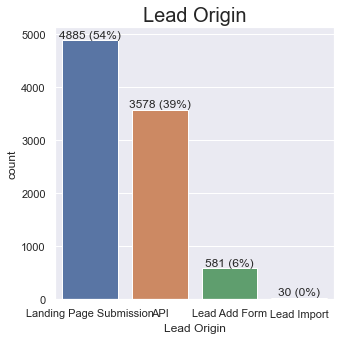

In [825]:
plt.figure(figsize=[5,5])
sns.set_style('darkgrid')
plt.title('Lead Origin',fontsize=20)
plot = sns.countplot(x = leads['Lead Origin'], order = leads['Lead Origin'].value_counts(ascending= False).index)
value_count = leads['Lead Origin'].value_counts(ascending = False).values
percentage_count = leads['Lead Origin'].value_counts(ascending = False, normalize=True).values*100
label = [f'{i[0]} ({i[1]:.0f}%)' for i in zip(value_count,percentage_count)]
plot.bar_label(container=plot.containers[0], labels = label)
plt.show()

#### Findings:
- 'Landing Page Submission' generated the maximum leads, followed by 'API' and 'lead Add Form'


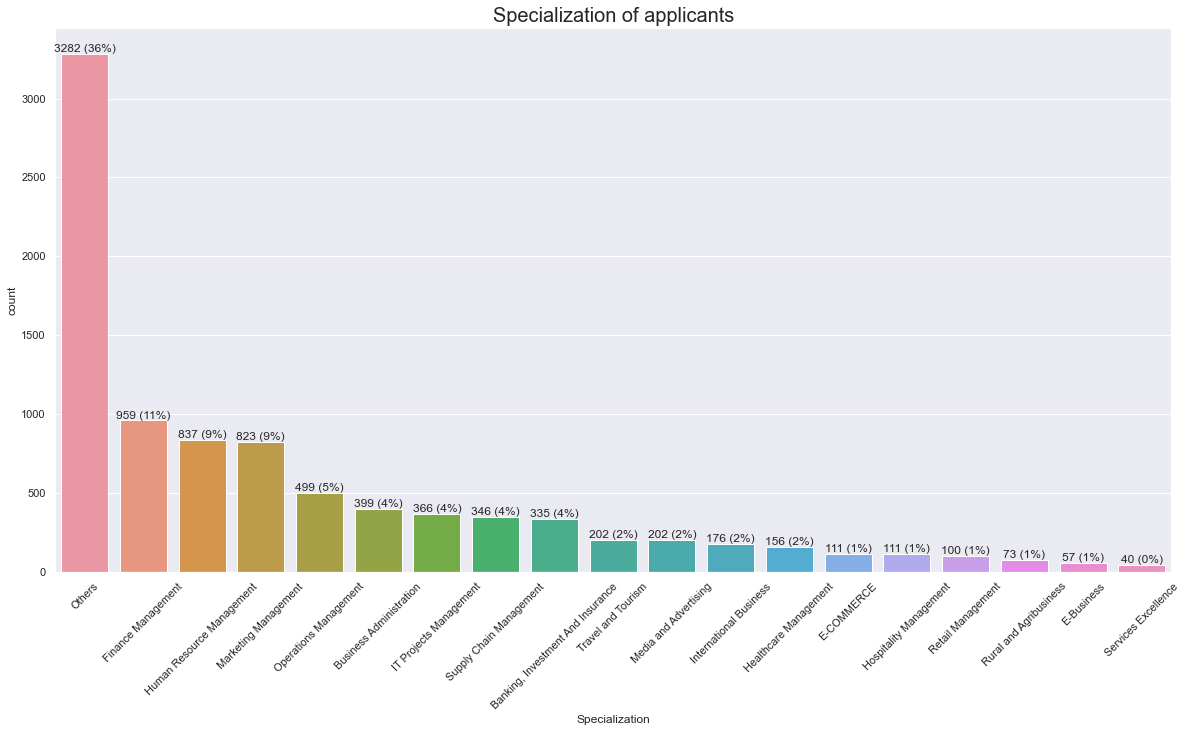

In [826]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
plt.title('Specialization of applicants',fontsize=20)
plt.xticks(rotation = 45)
plot = sns.countplot(x = leads['Specialization'], order = leads['Specialization'].value_counts(ascending= False).index)
value_count = leads['Specialization'].value_counts(ascending = False).values
percentage_count = leads['Specialization'].value_counts(ascending = False, normalize=True).values*100
label = [f'{i[0]} ({i[1]:.0f}%)' for i in zip(value_count,percentage_count)]
plot.bar_label(container=plot.containers[0], labels = label)
plt.show()

- Most applicants didn't provided their speacialization while filling up the form. 
- We can see that people who are in the finance domain form the majority of the applicant pool, followed by HR and marketing


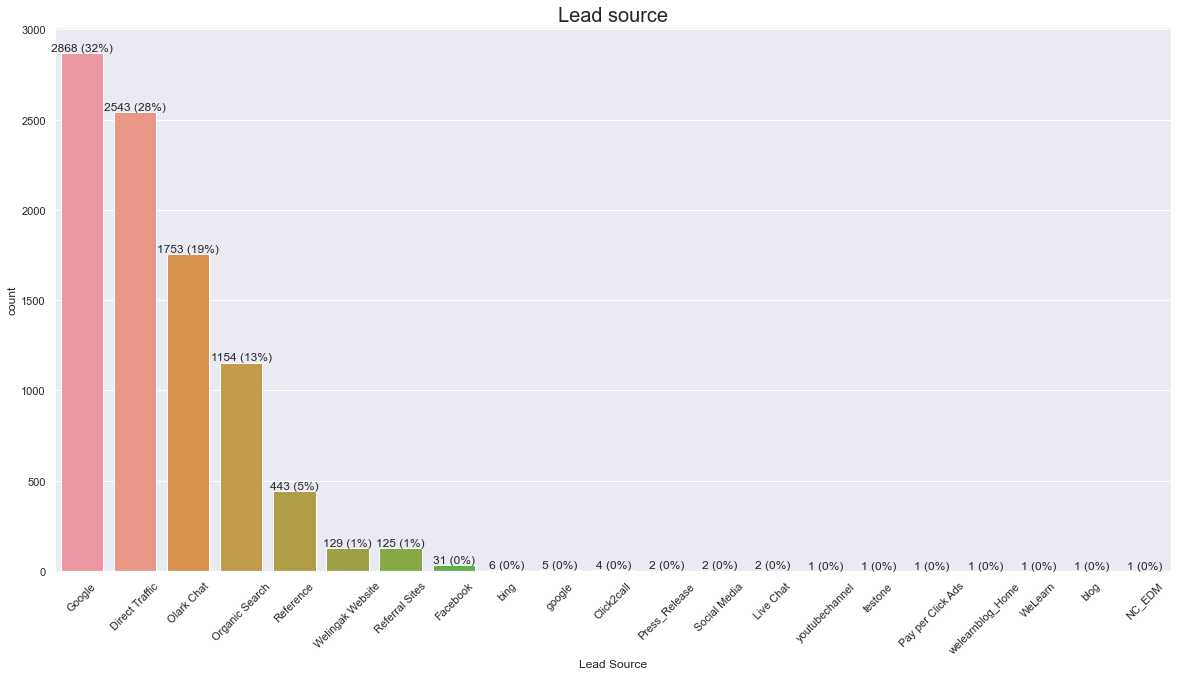

In [827]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
plt.title('Lead source',fontsize=20)
plt.xticks(rotation = 45)
plot = sns.countplot(x = leads['Lead Source'], order = leads['Lead Source'].value_counts(ascending= False).index)
value_count = leads['Lead Source'].value_counts(ascending = False).values
percentage_count = leads['Lead Source'].value_counts(ascending = False, normalize=True).values*100
label = [f'{i[0]} ({i[1]:.0f}%)' for i in zip(value_count,percentage_count)]
plot.bar_label(container=plot.containers[0], labels = label)
plt.show()

- 'Google' is the topmost source through which applicants have searched and landed up on the X Education website

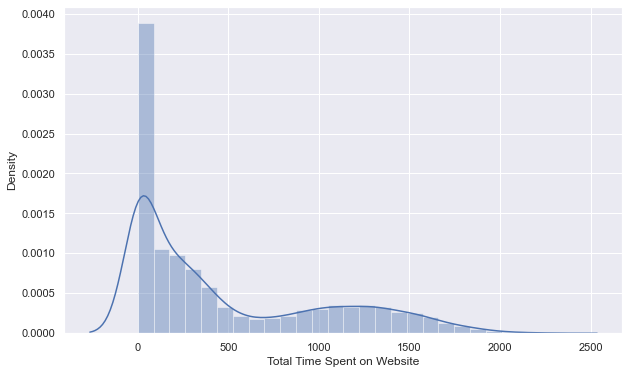

In [828]:
plt.figure(figsize=[10,6])
sns.distplot(leads['Total Time Spent on Website'])
plt.show()

- We see most customer spent only few seconds on the website

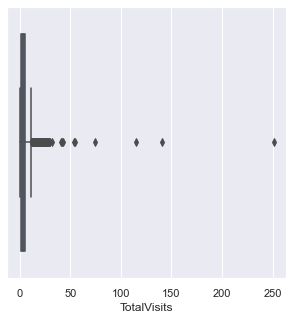

In [829]:
plt.figure(figsize=[5,5])
sns.boxplot(leads['TotalVisits'])
plt.show()

- We see a lot of outliers in the data . We can cap the outlier value to 95% for analysis

In [830]:
# capping outliers to 95% values
perc = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= perc[0]] = perc[0]
leads['TotalVisits'][leads['TotalVisits'] >= perc[1]] = perc[1]

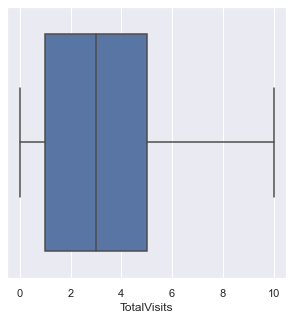

In [831]:
# plotting boxplot again
plt.figure(figsize=[5,5])
sns.boxplot(leads['TotalVisits'])
plt.show()

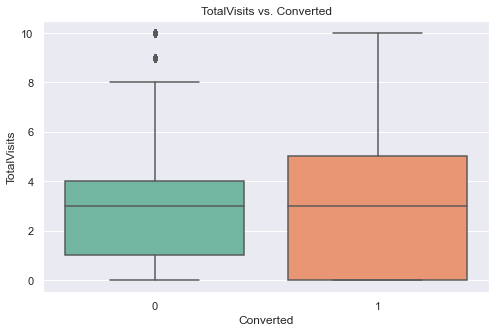

In [832]:
plt.figure(figsize=[8,5])
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set2')
plt.title('TotalVisits vs. Converted')
plt.show()

- The median value for both converted and not-converted is same . So nothing conclusive can be drawn from this

In [833]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

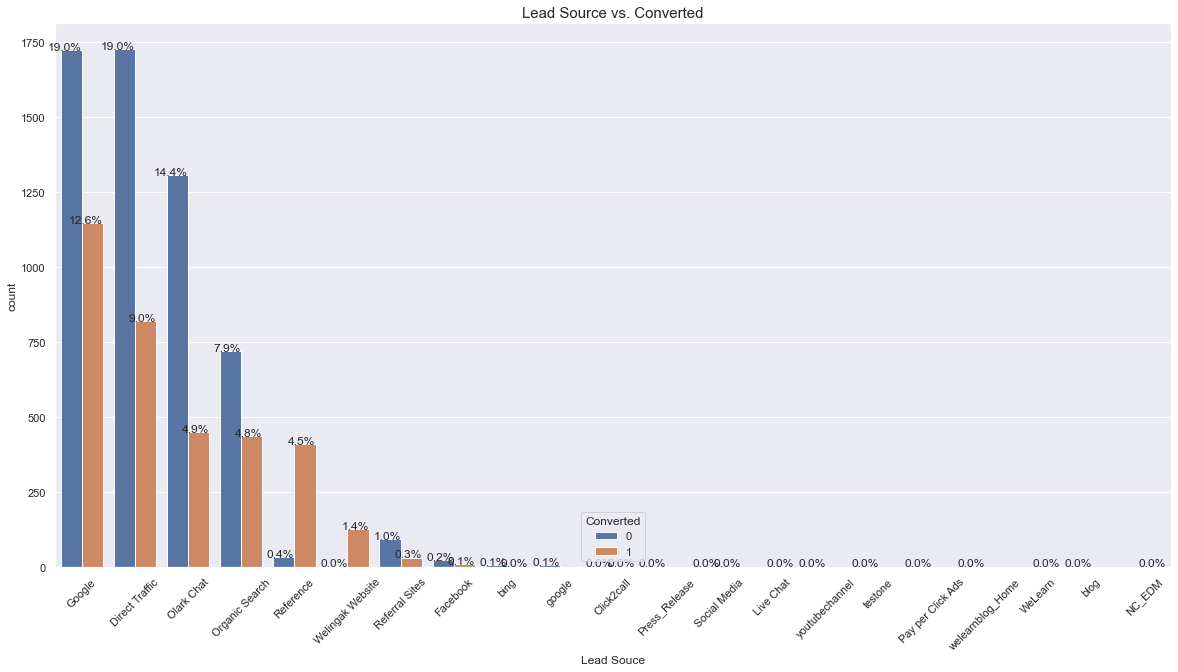

In [834]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
plt.title('Lead Source vs. Converted', fontsize=15)
plt.xticks(rotation=45)
plot = sns.countplot(x=leads['Lead Source'],hue = leads['Converted'],order = leads['Lead Source'].value_counts(ascending= False).index)
plt.xlabel('Lead Souce')

for i in plot.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/leads.index.size)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    plot.annotate(percentage,(x,y), ha='right')
plt.show()


- Even though maximum leads comes from google but the no-conversion rate is very high 
- However we see that leads coming through someone's reference has the high chances of getting converted

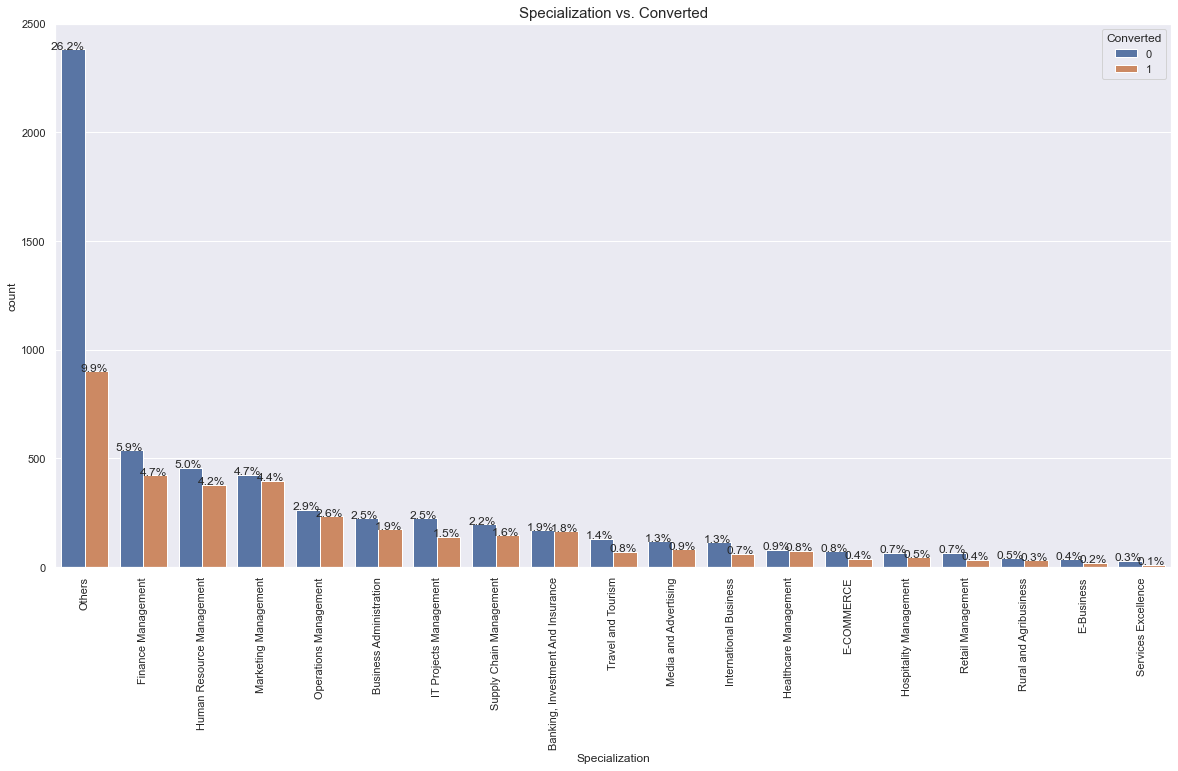

In [835]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
plt.title('Specialization vs. Converted', fontsize=15)
plt.xticks(rotation=90)
plot = sns.countplot(x=leads['Specialization'],hue = leads['Converted'],order = leads['Specialization'].value_counts(ascending= False).index)
plt.xlabel('Specialization')

for i in plot.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/leads.index.size)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    plot.annotate(percentage,(x,y), ha='right')
plt.show()

- Leads who have not mentioned their speacialization while filling up the form has the high chances of not enrolling for any course offered by the Edtech company.
- Leads coming from marketing, operations, BFSI, Healthcare has the high chance of getting converted.

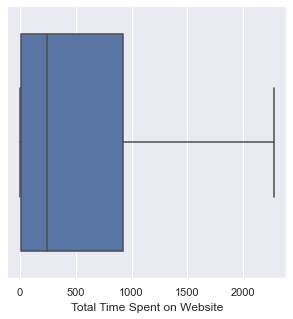

In [836]:
plt.figure(figsize=[5,5])
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

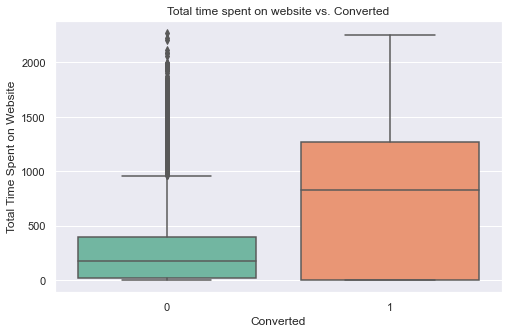

In [837]:
plt.figure(figsize=[8,5])
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set2')
plt.title('Total time spent on website vs. Converted')
plt.show()

- Leads spending more time on the website are more likely to get converted than spending less time 

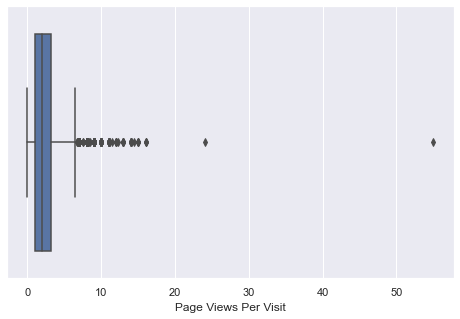

In [838]:
plt.figure(figsize=[8,5])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

- We see a lot of outliers in the data . We can cap the outlier value to 95% for analysis

In [839]:
# capping outliers to 95% values
perc = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= perc[0]] = perc[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= perc[1]] = perc[1]

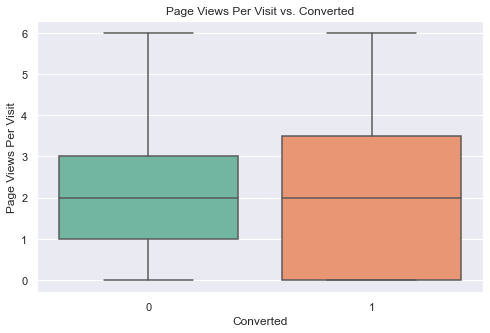

In [840]:
plt.figure(figsize=[8,5])
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads,palette='Set2')
plt.title('Page Views Per Visit vs. Converted')
plt.show()

- We see that the median values for both converted and not-converted are same. So, we can say that leads viewing more pages per visit doesn't necessarily gets converted

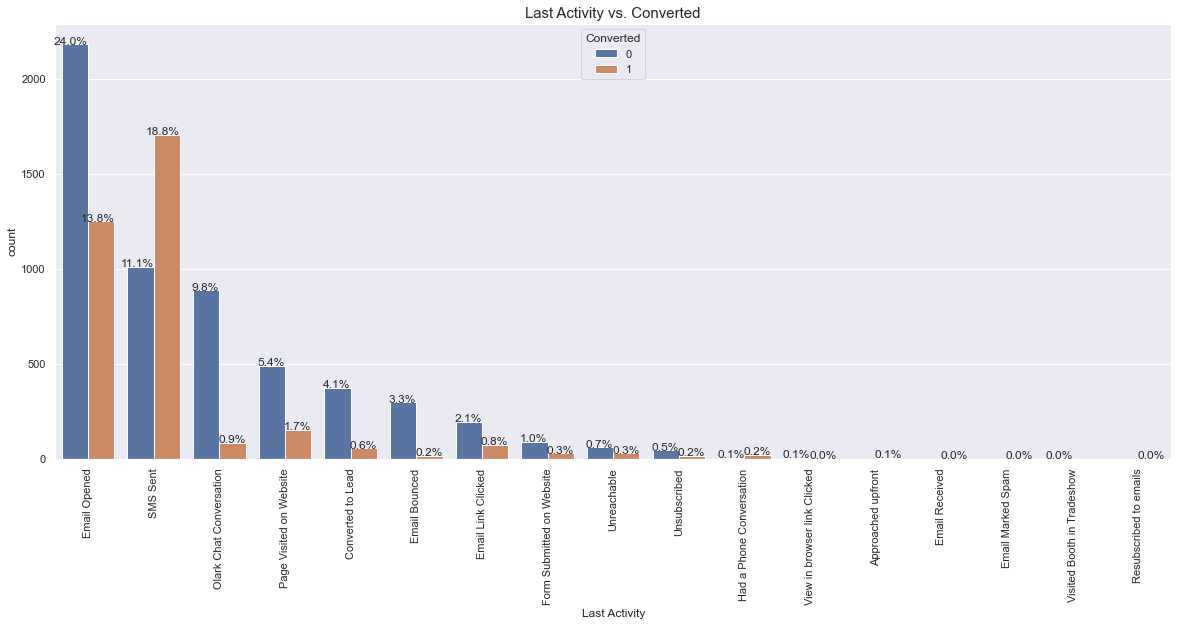

In [841]:
plt.figure(figsize=[20,8])
sns.set_style('darkgrid')
plt.title('Last Activity vs. Converted', fontsize=15)
plt.xticks(rotation=90)
plot = sns.countplot(x=leads['Last Activity'],hue = leads['Converted'],order = leads['Last Activity'].value_counts(ascending= False).index)
plt.xlabel('Last Activity')

for i in plot.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/leads.index.size)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    plot.annotate(percentage,(x,y), ha='right')
plt.show()

- Connversion rate is higher for leads having 'SMS sent' as their last activity.
- Most of the leads have 'Email Opened' as their last activity

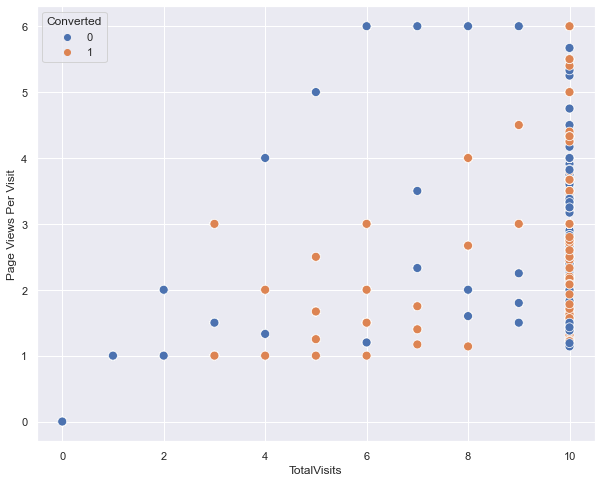

In [842]:
plt.figure(figsize=[10,8])
sns.set(style='darkgrid')
sns.scatterplot(data=leads,x='TotalVisits',y='Page Views Per Visit',hue='Converted',s=80)
plt.show()

- We see somewhat strong correlation for few data points where with an increase in visit time to the website tends to increase in viewing more pages per visit

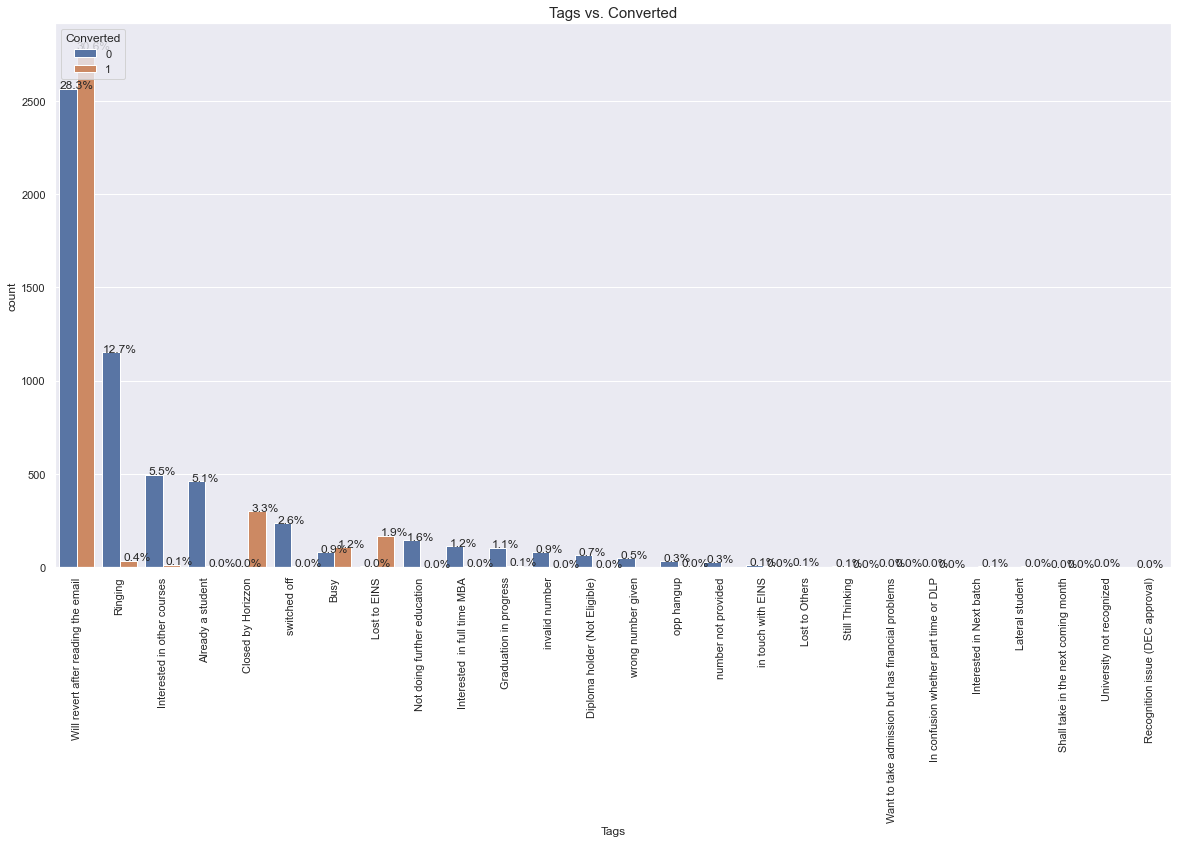

In [843]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
plt.title('Tags vs. Converted', fontsize=15)
plt.xticks(rotation= 90)
plot = sns.countplot(x=leads['Tags'],hue = leads['Converted'],order = leads['Tags'].value_counts(ascending= False).index)
plt.xlabel('Tags')

for i in plot.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/leads.index.size)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    plot.annotate(percentage,(x,y), ha='center')
plt.show()

- Leads who have a tag of 'Will revert after reading the email' has the highest percentage of conversion in comparison to other tags

### Step 4: Data Preparation

#### Creating Dummy variables for categorical variables

- At this point, we will drop the column 'Tags' as this column has been created by the marketing team for their own analysis. It is not required to us for further analysis.

In [844]:
leads = leads.drop('Tags', axis=1)

In [845]:
#checking for categorical columns
cat_col =[i for i in leads.columns if leads.dtypes[i]=='object']
cat_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']

In [846]:
#creating dummy variables for columns such as 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
# 'What matters most to you in choosing a course','City'.

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'What matters most to you in choosing a course','City']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [847]:
# adding the dummy dataframe columns with the leads dataframe column
leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,1,0,0,0,0,0,0,0,0


In [848]:
# Dropping off columns for which dummy variables have already been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'What matters most to you in choosing a course','City'], axis = 1)
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Train-Test split of data set

In [849]:
from sklearn.model_selection import train_test_split

# Putting predictor variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [850]:
# Putting criterion variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [851]:
# splitting the dataset into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [852]:
# checking shape of train data set
print(X_train.shape)
print(y_train.shape)

(6351, 72)
(6351,)


In [853]:
# checking shape of test data set
print(X_test.shape)
print(y_test.shape)

(2723, 72)
(2723,)


#### Rescaling the features

In [854]:
from sklearn.preprocessing import StandardScaler

In [855]:
scaler = StandardScaler()

In [856]:
num_var = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


#### Using RFE for feature selection

In [857]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=20)
rfe = rfe.fit(X_train, y_train) 

In [858]:
rfe.support_

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True])

In [859]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 3),
 ('Lead Source_welearnblog_Home', False, 2),
 ('Lead Source_youtubechannel

In [860]:
# Columns selected by RFE 
columns = X_train.columns[rfe.support_]
columns

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'Specialization_Hospitality Management',
       'Specialization_Media and Advertising

### Step 5: Model Building using Statmodels

##### Model no. 1

In [861]:
import statsmodels.api as sm

In [862]:
X_train_sm = sm.add_constant(X_train[columns])
log_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.1
Date:                Sun, 19 Mar 2023   Deviance:                       5294.2
Time:                        15:19:27   Pearson chi2:                 6.93e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7239      1.207      1.428      0.153      -0.642       4.090
Total Time Spent on Website                              1.1176      0.040     27.716      0.000       1.039       1.197
Page Views Per Visit                                    -0.1403      0.053     -2.629      0.009      -0.245      -0.036
Lead Origin_Landing Page Submission                     -0.9761      0.135     -7.217      0.000      -1.241      -0.711
Lead Origin_Lead Add Form                                0.2848      0.999      0.285      0.776      -1.674       2.243
Lead Source_Direct Traffic                              -0.7338      0.409     -1.795      0.073      -1.535       0.068
Lead Source_Google                                      -0.3869      0.405     -0.955      0.340      -1.181       0.407
Lead Source_Live Chat                                   23.8945   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_Olark Chat                                   0.5124      0.404      1.268      0.205      -0.280       1.305
Lead Source_Organic Search                              -0.4947      0.416     -1.189      0.234      -1.310       0.321
Lead Source_Press_Release                              -23.3142   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    2.3251      1.002      2.320      0.020       0.361       4.289
Lead Source_Referral Sites                              -0.6349      0.525     -1.209      0.227      -1.664       0.394
Lead Source_Social Media                                 1.2953      1.635      0.792      0.428      -1.909       4.500
Lead Source_Welingak Website                             4.8771      1.223      3.987      0.000       2.479       7.275
Lead Source_google                                     -21.9807   3.66e+04     -0.001      1.000   -7.17e+04    7.17e+04
Last Activity_Converted to Lead                         -1.3537      0.226     -5.992      0.000      -1.797      -0.911
Last Activity_Email Bounced                             -2.2359      0.381     -5.862      0.000      -2.984      -1.488
Last Activity_Email Link Clicked                        -0.4384      0.214     -2.049      0.040      -0.858      -0.019
Last Activity_Form Submitted on Website                 -0.9525      0.342     -2.783      0.005      -1.623      -0.282
Last Activity_Had a Phone Conversation                   2.4136      0.693      3.482      0.000       1.055       3.772
Last Activity_Olark Chat Conversation                   -1.5886      0.167     -9.496      0.000      -1.917      -1.261
Last Activity_Page Visited on Website                   -0

- We see the p-value of few variables are high so we will drop them and keep on building models and check the p-values.

In [863]:
# Dropping feature variables with high p value
column1 = columns.drop(['Lead Source_Live Chat','Lead Source_Press_Release','Lead Source_google',
                        'Last Activity_Resubscribed to emails','What is your current occupation_Housewife'])

##### Model No. 2

In [864]:
X_train_sm = sm.add_constant(X_train[column1])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.4
Date:                Sun, 19 Mar 2023   Deviance:                       5304.7
Time:                        15:19:27   Pearson chi2:                 6.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5132      1.011      2.485      0.013       0.531       4.495
Total Time Spent on Website                              1.1150      0.040     27.683      0.000       1.036       1.194
Page Views Per Visit                                    -0.1489      0.053     -2.797      0.005      -0.253      -0.045
Lead Origin_Landing Page Submission                     -0.9756      0.134     -7.262      0.000      -1.239      -0.712
Lead Origin_Lead Add Form                                1.1713      0.922      1.271      0.204      -0.635       2.978
Lead Source_Direct Traffic                              -0.5975      0.393     -1.522      0.128      -1.367       0.172
Lead Source_Google                                      -0.2500      0.389     -0.642      0.521      -1.013       0.513
Lead Source_Olark Chat                                   0.6366      0.391      1.626      0.104      -0.131       1.404
Lead Source_Organic Search                              -0.3516      0.399     -0.880      0.379      -1.134       0.431
Lead Source_Reference                                    1.5590      0.899      1.735      0.083      -0.203       3.321
Lead Source_Referral Sites                              -0.4941      0.512     -0.964      0.335      -1.498       0.510
Lead Source_Social Media                                 1.4490      1.637      0.885      0.376      -1.760       4.658
Lead Source_Welingak Website                             4.1114      1.138      3.612      0.000       1.880       6.342
Last Activity_Converted to Lead                         -1.3609      0.226     -6.026      0.000      -1.803      -0.918
Last Activity_Email Bounced                             -2.2403      0.381     -5.874      0.000      -2.988      -1.493
Last Activity_Email Link Clicked                        -0.4407      0.214     -2.062      0.039      -0.860      -0.022
Last Activity_Form Submitted on Website                 -0.9727      0.342     -2.846      0.004      -1.643      -0.303
Last Activity_Had a Phone Conversation                   2.4105      0.693      3.477      0.001       1.052       3.769
Last Activity_Olark Chat Conversation                   -1.5922      0.167     -9.523      0.000      -1.920      -1.264
Last Activity_Page Visited on Website                   -0.5672      0.147     -3.847      0.000      -0.856      -0.278
Last Activity_SMS Sent                                   1.1223      0.078     14.421      0.000       0.970       1.275
Last Activity_View in browser link Clicked              -0.8784      1.150     -0.764      0.445      -3.131       1.375
Specialization_Hospitality Management                   -0

- Since the p value of 'What is your current occupation_Working Professional' is high we can drop this column

In [865]:
# Dropping column 'What is your current occupation_Working Professional'
column1 = column1.drop('What is your current occupation_Working Professional')

##### Model No. 3

In [866]:
X_train_sm = sm.add_constant(X_train[column1])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.4
Date:                Sun, 19 Mar 2023   Deviance:                       5304.9
Time:                        15:19:28   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.8457      0.431      6.595      0.000       2.000       3.691
Total Time Spent on Website                    1.1152      0.040     27.687      0.000       1.036       1.194
Page Views Per Visit                          -0.1487      0.053     -2.794      0.005      -0.253      -0.044
Lead Origin_Landing Page Submission           -0.9750      0.134     -7.257      0.000      -1.238      -0.712
Lead Origin_Lead Add Form                      1.1713      0.922      1.271      0.204      -0.635       2.978
Lead Source_Direct Traffic                    -0.5985      0.393     -1.525      0.127      -1.368       0.171
Lead Source_Google                            -0.2507      0.389     -0.644      0.519      -1.013       0.512
Lead Source_Olark Chat                         0.6367      0.391      1.627      0.104      -0.130       1.404
Lead Source_Organic Search                    -0.3537      0.399     -0.886      0.376      -1.136       0.429
Lead Source_Reference                          1.5587      0.899      1.734      0.083      -0.203       3.320
Lead Source_Referral Sites                    -0.4939      0.512     -0.964      0.335      -1.498       0.510
Lead Source_Social Media                       1.4481      1.637      0.885      0.376      -1.761       4.657
Lead Source_Welingak Website                   4.1114      1.138      3.612      0.000       1.880       6.342
Last Activity_Converted to Lead               -1.3593      0.226     -6.023      0.000      -1.802      -0.917
Last Activity_Email Bounced                   -2.2392      0.381     -5.874      0.000      -2.986      -1.492
Last Activity_Email Link Clicked              -0.4405      0.214     -2.060      0.039      -0.860      -0.021
Last Activity_Form Submitted on Website       -0.9805      0.341     -2.873      0.004      -1.649      -0.312
Last Activity_Had a Phone Conversation         2.4109      0.693      3.478      0.001       1.052       3.770
Last Activity_Olark Chat Conversation         -1.5918      0.167     -9.522      0.000      -1.919      -1.264
Last Activity_Page Visited on Website         -0.5679      0.147     -3.851      0.000      -0.857      -0.279
Last Activity_SMS Sent                         1.1228      0.078     14.429      0.000       0.970       1.275
Last Activity_View in browser link Clicked    -0.8760      1.150     -0.762      0.446      -3.129       1.377
Specialization_Hospitality Management         -0.5075      0.328     -1.548      0.122      -1.150       0.135
Specialization_Media and Advertising          -0.3603      0.223     -1.619      0.105      -0.796       0.076
Specialization_Others                         -1.2085      0.127     -9.553      0.000

- Removing 'Lead Source_Google' as it has high p value

In [867]:
# Dropping column 'Lead Source_Google'
column1 = column1.drop('Lead Source_Google')

##### Model no. 4

In [868]:
X_train_sm = sm.add_constant(X_train[column1])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.6
Date:                Sun, 19 Mar 2023   Deviance:                       5305.3
Time:                        15:19:29   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.6073      0.222     11.736      0.000       2.172       3.043
Total Time Spent on Website                    1.1130      0.040     27.741      0.000       1.034       1.192
Page Views Per Visit                          -0.1522      0.053     -2.874      0.004      -0.256      -0.048
Lead Origin_Landing Page Submission           -0.9801      0.134     -7.299      0.000      -1.243      -0.717
Lead Origin_Lead Add Form                      1.3635      0.879      1.551      0.121      -0.359       3.086
Lead Source_Direct Traffic                    -0.3527      0.094     -3.749      0.000      -0.537      -0.168
Lead Source_Olark Chat                         0.8727      0.140      6.225      0.000       0.598       1.148
Lead Source_Organic Search                    -0.1070      0.115     -0.934      0.350      -0.332       0.118
Lead Source_Reference                          1.6011      0.901      1.777      0.076      -0.165       3.367
Lead Source_Referral Sites                    -0.2487      0.343     -0.724      0.469      -0.922       0.424
Lead Source_Social Media                       1.6886      1.594      1.059      0.289      -1.435       4.812
Lead Source_Welingak Website                   4.1556      1.140      3.645      0.000       1.921       6.390
Last Activity_Converted to Lead               -1.3641      0.225     -6.049      0.000      -1.806      -0.922
Last Activity_Email Bounced                   -2.2418      0.381     -5.881      0.000      -2.989      -1.495
Last Activity_Email Link Clicked              -0.4428      0.214     -2.072      0.038      -0.862      -0.024
Last Activity_Form Submitted on Website       -0.9851      0.341     -2.888      0.004      -1.654      -0.317
Last Activity_Had a Phone Conversation         2.4055      0.693      3.471      0.001       1.047       3.764
Last Activity_Olark Chat Conversation         -1.5939      0.167     -9.537      0.000      -1.921      -1.266
Last Activity_Page Visited on Website         -0.5677      0.147     -3.850      0.000      -0.857      -0.279
Last Activity_SMS Sent                         1.1213      0.078     14.418      0.000       0.969       1.274
Last Activity_View in browser link Clicked    -0.8797      1.149     -0.765      0.444      -3.133       1.373
Specialization_Hospitality Management         -0.5081      0.328     -1.550      0.121      -1.151       0.134
Specialization_Media and Advertising          -0.3564      0.222     -1.602      0.109      -0.792       0.080
Specialization_Others                         -1.2125      0.127     -9.581      0.000      -1.461      -0.964
Specialization_Services Excellence            -0.6772      0.638     -1.061      0.289

- will drop off Lead Source_Referral Sites' as it has high p value

In [869]:
# Dropping column 'Lead Source_Referral Sites'
column1 = column1.drop('Lead Source_Referral Sites')

##### Model No. 5

In [870]:
X_train_sm = sm.add_constant(X_train[column1])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.9
Date:                Sun, 19 Mar 2023   Deviance:                       5305.8
Time:                        15:19:30   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5960      0.222     11.712      0.000       2.162       3.030
Total Time Spent on Website                    1.1138      0.040     27.763      0.000       1.035       1.192
Page Views Per Visit                          -0.1549      0.053     -2.933      0.003      -0.258      -0.051
Lead Origin_Landing Page Submission           -0.9742      0.134     -7.270      0.000      -1.237      -0.712
Lead Origin_Lead Add Form                      1.3698      0.879      1.558      0.119      -0.353       3.093
Lead Source_Direct Traffic                    -0.3491      0.094     -3.714      0.000      -0.533      -0.165
Lead Source_Olark Chat                         0.8831      0.140      6.328      0.000       0.610       1.157
Lead Source_Organic Search                    -0.0985      0.114     -0.864      0.388      -0.322       0.125
Lead Source_Reference                          1.6033      0.901      1.779      0.075      -0.163       3.370
Lead Source_Social Media                       1.6977      1.594      1.065      0.287      -1.426       4.821
Lead Source_Welingak Website                   4.1601      1.140      3.649      0.000       1.926       6.395
Last Activity_Converted to Lead               -1.3653      0.225     -6.058      0.000      -1.807      -0.924
Last Activity_Email Bounced                   -2.2423      0.381     -5.882      0.000      -2.990      -1.495
Last Activity_Email Link Clicked              -0.4454      0.214     -2.085      0.037      -0.864      -0.027
Last Activity_Form Submitted on Website       -0.9841      0.341     -2.886      0.004      -1.652      -0.316
Last Activity_Had a Phone Conversation         2.4063      0.694      3.468      0.001       1.046       3.766
Last Activity_Olark Chat Conversation         -1.5954      0.167     -9.544      0.000      -1.923      -1.268
Last Activity_Page Visited on Website         -0.5695      0.147     -3.862      0.000      -0.859      -0.280
Last Activity_SMS Sent                         1.1230      0.078     14.447      0.000       0.971       1.275
Last Activity_View in browser link Clicked    -0.8744      1.150     -0.760      0.447      -3.128       1.379
Specialization_Hospitality Management         -0.5081      0.328     -1.550      0.121      -1.151       0.134
Specialization_Media and Advertising          -0.3558      0.222     -1.599      0.110      -0.792       0.080
Specialization_Others                         -1.2174      0.126     -9.634      0.000      -1.465      -0.970
Specialization_Services Excellence            -0.6819      0.637     -1.070      0.284      -1.931       0.567
Specialization_Travel and Tourism             -0.3186      0.244     -1.304      0.192

- Will drop off 'Last Activity_View in browser link Clicked' as it has high p value

In [871]:
# Dropping column 'Last Activity_View in browser link Clicked'
column1 = column1.drop('Last Activity_View in browser link Clicked')

##### Model no. 6

In [872]:
X_train_sm = sm.add_constant(X_train[column1])
log_m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.2
Date:                Sun, 19 Mar 2023   Deviance:                       5306.5
Time:                        15:19:31   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5880      0.221     11.707      0.000       2.155       3.021
Total Time Spent on Website                    1.1142      0.040     27.778      0.000       1.036       1.193
Page Views Per Visit                          -0.1556      0.053     -2.947      0.003      -0.259      -0.052
Lead Origin_Landing Page Submission           -0.9725      0.134     -7.265      0.000      -1.235      -0.710
Lead Origin_Lead Add Form                      1.3715      0.879      1.560      0.119      -0.352       3.094
Lead Source_Direct Traffic                    -0.3488      0.094     -3.711      0.000      -0.533      -0.165
Lead Source_Olark Chat                         0.8829      0.140      6.327      0.000       0.609       1.156
Lead Source_Organic Search                    -0.0970      0.114     -0.851      0.395      -0.320       0.126
Lead Source_Reference                          1.6032      0.901      1.779      0.075      -0.163       3.370
Lead Source_Social Media                       1.6982      1.594      1.066      0.287      -1.425       4.821
Lead Source_Welingak Website                   4.1594      1.140      3.648      0.000       1.925       6.394
Last Activity_Converted to Lead               -1.3636      0.225     -6.051      0.000      -1.805      -0.922
Last Activity_Email Bounced                   -2.2407      0.381     -5.879      0.000      -2.988      -1.494
Last Activity_Email Link Clicked              -0.4434      0.214     -2.076      0.038      -0.862      -0.025
Last Activity_Form Submitted on Website       -0.9816      0.341     -2.879      0.004      -1.650      -0.313
Last Activity_Had a Phone Conversation         2.4086      0.694      3.471      0.001       1.048       3.769
Last Activity_Olark Chat Conversation         -1.5931      0.167     -9.532      0.000      -1.921      -1.266
Last Activity_Page Visited on Website         -0.5675      0.147     -3.849      0.000      -0.856      -0.278
Last Activity_SMS Sent                         1.1250      0.078     14.479      0.000       0.973       1.277
Specialization_Hospitality Management         -0.5071      0.328     -1.547      0.122      -1.149       0.135
Specialization_Media and Advertising          -0.3551      0.222     -1.596      0.110      -0.791       0.081
Specialization_Others                         -1.2163      0.126     -9.640      0.000      -1.464      -0.969
Specialization_Services Excellence            -0.6811      0.637     -1.069      0.285      -1.930       0.568
Specialization_Travel and Tourism             -0.3181      0.244     -1.302      0.193      -0.797       0.161
What is your current occupation_Other         -1.9005      0.790     -2.406      0.016

- Will drop off 'Lead Source_Organic Search	' as it has significantly high p value

In [873]:
# Dropping column 'Lead Source_Organic Search'
column1 = column1.drop('Lead Source_Organic Search')

##### Model no. 7

In [874]:
X_train_sm = sm.add_constant(X_train[column1])
log_m7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.6
Date:                Sun, 19 Mar 2023   Deviance:                       5307.2
Time:                        15:19:31   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5688      0.220     11.683      0.000       2.138       3.000
Total Time Spent on Website                    1.1144      0.040     27.789      0.000       1.036       1.193
Page Views Per Visit                          -0.1641      0.052     -3.165      0.002      -0.266      -0.062
Lead Origin_Landing Page Submission           -0.9715      0.134     -7.255      0.000      -1.234      -0.709
Lead Origin_Lead Add Form                      1.3807      0.879      1.570      0.116      -0.343       3.104
Lead Source_Direct Traffic                    -0.3270      0.090     -3.615      0.000      -0.504      -0.150
Lead Source_Olark Chat                         0.8966      0.139      6.466      0.000       0.625       1.168
Lead Source_Reference                          1.6059      0.902      1.781      0.075      -0.161       3.373
Lead Source_Social Media                       1.7263      1.598      1.080      0.280      -1.406       4.859
Lead Source_Welingak Website                   4.1654      1.140      3.653      0.000       1.930       6.400
Last Activity_Converted to Lead               -1.3739      0.225     -6.107      0.000      -1.815      -0.933
Last Activity_Email Bounced                   -2.2538      0.381     -5.917      0.000      -3.000      -1.507
Last Activity_Email Link Clicked              -0.4455      0.214     -2.086      0.037      -0.864      -0.027
Last Activity_Form Submitted on Website       -0.9708      0.341     -2.849      0.004      -1.639      -0.303
Last Activity_Had a Phone Conversation         2.4043      0.695      3.460      0.001       1.043       3.766
Last Activity_Olark Chat Conversation         -1.5915      0.167     -9.523      0.000      -1.919      -1.264
Last Activity_Page Visited on Website         -0.5677      0.147     -3.851      0.000      -0.857      -0.279
Last Activity_SMS Sent                         1.1230      0.078     14.462      0.000       0.971       1.275
Specialization_Hospitality Management         -0.5174      0.327     -1.583      0.114      -1.158       0.123
Specialization_Media and Advertising          -0.3668      0.222     -1.651      0.099      -0.802       0.069
Specialization_Others                         -1.2231      0.126     -9.708      0.000      -1.470      -0.976
Specialization_Services Excellence            -0.6837      0.637     -1.073      0.283      -1.933       0.565
Specialization_Travel and Tourism             -0.3405      0.243     -1.401      0.161      -0.817       0.136
What is your current occupation_Other         -1.9148      0.786     -2.437      0.015      -3.455      -0.375
What is your current occupation_Student       -2.2153      0.292     -7.581      0.000

- will drop 'Specialization_Services Excellence' as it has high p value

In [875]:
# Dropping column 'Specialization_Services Excellence'
column1 = column1.drop('Specialization_Services Excellence')

##### Model No. 8

In [876]:
X_train_sm = sm.add_constant(X_train[column1])
log_m8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.2
Date:                Sun, 19 Mar 2023   Deviance:                       5308.4
Time:                        15:19:32   Pearson chi2:                 6.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5610      0.220     11.665      0.000       2.131       2.991
Total Time Spent on Website                    1.1147      0.040     27.797      0.000       1.036       1.193
Page Views Per Visit                          -0.1636      0.052     -3.155      0.002      -0.265      -0.062
Lead Origin_Landing Page Submission           -0.9699      0.134     -7.246      0.000      -1.232      -0.708
Lead Origin_Lead Add Form                      1.3833      0.879      1.573      0.116      -0.340       3.107
Lead Source_Direct Traffic                    -0.3287      0.090     -3.634      0.000      -0.506      -0.151
Lead Source_Olark Chat                         0.8972      0.139      6.470      0.000       0.625       1.169
Lead Source_Reference                          1.6006      0.901      1.775      0.076      -0.166       3.367
Lead Source_Social Media                       1.7288      1.597      1.082      0.279      -1.402       4.859
Lead Source_Welingak Website                   4.1644      1.140      3.652      0.000       1.929       6.400
Last Activity_Converted to Lead               -1.3724      0.225     -6.102      0.000      -1.813      -0.932
Last Activity_Email Bounced                   -2.2623      0.381     -5.945      0.000      -3.008      -1.516
Last Activity_Email Link Clicked              -0.4576      0.214     -2.139      0.032      -0.877      -0.038
Last Activity_Form Submitted on Website       -0.9686      0.341     -2.843      0.004      -1.636      -0.301
Last Activity_Had a Phone Conversation         2.4049      0.695      3.461      0.001       1.043       3.767
Last Activity_Olark Chat Conversation         -1.5943      0.167     -9.544      0.000      -1.922      -1.267
Last Activity_Page Visited on Website         -0.5688      0.147     -3.861      0.000      -0.858      -0.280
Last Activity_SMS Sent                         1.1206      0.078     14.440      0.000       0.969       1.273
Specialization_Hospitality Management         -0.5135      0.327     -1.571      0.116      -1.154       0.127
Specialization_Media and Advertising          -0.3635      0.222     -1.636      0.102      -0.799       0.072
Specialization_Others                         -1.2184      0.126     -9.678      0.000      -1.465      -0.972
Specialization_Travel and Tourism             -0.3374      0.243     -1.388      0.165      -0.814       0.139
What is your current occupation_Other         -1.9081      0.786     -2.429      0.015      -3.448      -0.369
What is your current occupation_Student       -2.2084      0.292     -7.562      0.000      -2.781      -1.636
What is your current occupation_Unemployed    -2.6749      0.190    -14.056      0.000

- Will drop 'Lead Source_Social Media' due to its high p value as compared to other feature variables

In [877]:
# Dropping column 'Lead Source_Social Media'
column1 = column1.drop('Lead Source_Social Media')

##### Model No. 9

In [878]:
X_train_sm = sm.add_constant(X_train[column1])
log_m12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.8
Date:                Sun, 19 Mar 2023   Deviance:                       5309.5
Time:                        15:19:33   Pearson chi2:                 6.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5651      0.220     11.682      0.000       2.135       2.996
Total Time Spent on Website                    1.1145      0.040     27.793      0.000       1.036       1.193
Page Views Per Visit                          -0.1644      0.052     -3.172      0.002      -0.266      -0.063
Lead Origin_Landing Page Submission           -0.9742      0.134     -7.279      0.000      -1.237      -0.712
Lead Origin_Lead Add Form                      1.3791      0.879      1.568      0.117      -0.344       3.102
Lead Source_Direct Traffic                    -0.3299      0.090     -3.647      0.000      -0.507      -0.153
Lead Source_Olark Chat                         0.8930      0.139      6.443      0.000       0.621       1.165
Lead Source_Reference                          1.6007      0.902      1.776      0.076      -0.166       3.368
Lead Source_Welingak Website                   4.1660      1.140      3.653      0.000       1.931       6.401
Last Activity_Converted to Lead               -1.3732      0.225     -6.106      0.000      -1.814      -0.932
Last Activity_Email Bounced                   -2.2628      0.381     -5.946      0.000      -3.009      -1.517
Last Activity_Email Link Clicked              -0.4573      0.214     -2.137      0.033      -0.877      -0.038
Last Activity_Form Submitted on Website       -0.9701      0.341     -2.847      0.004      -1.638      -0.302
Last Activity_Had a Phone Conversation         2.4037      0.695      3.459      0.001       1.042       3.766
Last Activity_Olark Chat Conversation         -1.5839      0.166     -9.519      0.000      -1.910      -1.258
Last Activity_Page Visited on Website         -0.5652      0.147     -3.838      0.000      -0.854      -0.277
Last Activity_SMS Sent                         1.1207      0.078     14.441      0.000       0.969       1.273
Specialization_Hospitality Management         -0.5141      0.327     -1.573      0.116      -1.155       0.126
Specialization_Media and Advertising          -0.3642      0.222     -1.640      0.101      -0.800       0.071
Specialization_Others                         -1.2232      0.126     -9.720      0.000      -1.470      -0.977
Specialization_Travel and Tourism             -0.3260      0.243     -1.342      0.180      -0.802       0.150
What is your current occupation_Other         -1.9100      0.785     -2.432      0.015      -3.449      -0.371
What is your current occupation_Student       -2.2084      0.292     -7.561      0.000      -2.781      -1.636
What is your current occupation_Unemployed    -2.6738      0.190    -14.048      0.000      -3.047      -2.301
City_Tier II Cities                           -0.5336      0.431     -1.239      0.215

In [879]:
# Dropping column 'City_Tier II Cities'
column1 = column1.drop('City_Tier II Cities')

##### Model No. 10

In [880]:
X_train_sm = sm.add_constant(X_train[column1])
log_m10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.6
Date:                Sun, 19 Mar 2023   Deviance:                       5311.1
Time:                        15:19:34   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5620      0.219     11.679      0.000       2.132       2.992
Total Time Spent on Website                    1.1142      0.040     27.801      0.000       1.036       1.193
Page Views Per Visit                          -0.1630      0.052     -3.146      0.002      -0.265      -0.061
Lead Origin_Landing Page Submission           -0.9777      0.134     -7.306      0.000      -1.240      -0.715
Lead Origin_Lead Add Form                      1.3806      0.879      1.570      0.116      -0.343       3.104
Lead Source_Direct Traffic                    -0.3350      0.090     -3.707      0.000      -0.512      -0.158
Lead Source_Olark Chat                         0.8940      0.139      6.451      0.000       0.622       1.166
Lead Source_Reference                          1.6003      0.902      1.775      0.076      -0.167       3.367
Lead Source_Welingak Website                   4.1682      1.141      3.654      0.000       1.933       6.404
Last Activity_Converted to Lead               -1.3746      0.225     -6.117      0.000      -1.815      -0.934
Last Activity_Email Bounced                   -2.2943      0.380     -6.031      0.000      -3.040      -1.549
Last Activity_Email Link Clicked              -0.4582      0.214     -2.143      0.032      -0.877      -0.039
Last Activity_Form Submitted on Website       -0.9661      0.341     -2.836      0.005      -1.634      -0.298
Last Activity_Had a Phone Conversation         2.4051      0.695      3.461      0.001       1.043       3.767
Last Activity_Olark Chat Conversation         -1.5845      0.166     -9.523      0.000      -1.911      -1.258
Last Activity_Page Visited on Website         -0.5686      0.147     -3.861      0.000      -0.857      -0.280
Last Activity_SMS Sent                         1.1184      0.078     14.419      0.000       0.966       1.270
Specialization_Hospitality Management         -0.5184      0.327     -1.584      0.113      -1.160       0.123
Specialization_Media and Advertising          -0.3654      0.222     -1.644      0.100      -0.801       0.070
Specialization_Others                         -1.2221      0.126     -9.710      0.000      -1.469      -0.975
Specialization_Travel and Tourism             -0.3305      0.242     -1.363      0.173      -0.806       0.145
What is your current occupation_Other         -1.9024      0.785     -2.423      0.015      -3.441      -0.363
What is your current occupation_Student       -2.2008      0.292     -7.540      0.000      -2.773      -1.629
What is your current occupation_Unemployed    -2.6701      0.190    -14.044      0.000      -3.043      -2.297
======================================================================================

- Removing 'Specialization_Travel and Tourism' column due to it's high p value as compared to other variables

In [881]:
# Dropping column 'Specialization_Travel and Tourism'
column1 = column1.drop('Specialization_Travel and Tourism')

##### Model no. 11

In [882]:
X_train_sm = sm.add_constant(X_train[column1])
log_m11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.5
Date:                Sun, 19 Mar 2023   Deviance:                       5313.0
Time:                        15:19:35   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5600      0.220     11.663      0.000       2.130       2.990
Total Time Spent on Website                    1.1143      0.040     27.813      0.000       1.036       1.193
Page Views Per Visit                          -0.1661      0.052     -3.209      0.001      -0.268      -0.065
Lead Origin_Landing Page Submission           -0.9813      0.134     -7.331      0.000      -1.244      -0.719
Lead Origin_Lead Add Form                      1.3829      0.879      1.573      0.116      -0.340       3.105
Lead Source_Direct Traffic                    -0.3324      0.090     -3.681      0.000      -0.509      -0.155
Lead Source_Olark Chat                         0.8899      0.139      6.424      0.000       0.618       1.161
Lead Source_Reference                          1.5966      0.901      1.772      0.076      -0.170       3.363
Lead Source_Welingak Website                   4.1639      1.141      3.651      0.000       1.928       6.399
Last Activity_Converted to Lead               -1.3819      0.224     -6.157      0.000      -1.822      -0.942
Last Activity_Email Bounced                   -2.3169      0.380     -6.098      0.000      -3.062      -1.572
Last Activity_Email Link Clicked              -0.4547      0.214     -2.128      0.033      -0.874      -0.036
Last Activity_Form Submitted on Website       -0.9760      0.341     -2.859      0.004      -1.645      -0.307
Last Activity_Had a Phone Conversation         2.4035      0.696      3.451      0.001       1.038       3.769
Last Activity_Olark Chat Conversation         -1.5842      0.166     -9.524      0.000      -1.910      -1.258
Last Activity_Page Visited on Website         -0.5760      0.147     -3.914      0.000      -0.864      -0.288
Last Activity_SMS Sent                         1.1156      0.078     14.393      0.000       0.964       1.268
Specialization_Hospitality Management         -0.5072      0.327     -1.549      0.121      -1.149       0.135
Specialization_Media and Advertising          -0.3532      0.222     -1.590      0.112      -0.789       0.082
Specialization_Others                         -1.2145      0.126     -9.656      0.000      -1.461      -0.968
What is your current occupation_Other         -1.8973      0.785     -2.415      0.016      -3.437      -0.358
What is your current occupation_Student       -2.2086      0.292     -7.566      0.000      -2.781      -1.636
What is your current occupation_Unemployed    -2.6739      0.190    -14.057      0.000      -3.047      -2.301
==============================================================================================================
"""

#### Checking VIF score of feature variables

- We will create a dataframe that willcontain the feature variables along with their VIF score

In [883]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [884]:
vif = pd.DataFrame()
vif['Feature_var'] = X_train[column1].columns
vif['VIF'] = [variance_inflation_factor(X_train[column1].values, i) for i in range(X_train[column1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature_var,VIF
3,Lead Origin_Lead Add Form,62.72
6,Lead Source_Reference,48.05
7,Lead Source_Welingak Website,15.53
21,What is your current occupation_Unemployed,8.18
2,Lead Origin_Landing Page Submission,6.17
18,Specialization_Others,4.01
5,Lead Source_Olark Chat,2.84
1,Page Views Per Visit,2.28
4,Lead Source_Direct Traffic,2.03
15,Last Activity_SMS Sent,1.75


- Removing 'Lead Origin_Lead Add Form' as it has high VIF score and again check the VIF score for all feature variables

In [885]:
# Dropping column 'Lead Origin_Lead Add Form'
column1 = column1.drop('Lead Origin_Lead Add Form')

##### Model No. 12

In [886]:
X_train_sm = sm.add_constant(X_train[column1])
log_m12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.9
Date:                Sun, 19 Mar 2023   Deviance:                       5315.7
Time:                        15:19:36   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5778      0.219     11.747      0.000       2.148       3.008
Total Time Spent on Website                    1.1128      0.040     27.808      0.000       1.034       1.191
Page Views Per Visit                          -0.1716      0.052     -3.321      0.001      -0.273      -0.070
Lead Origin_Landing Page Submission           -0.9969      0.134     -7.462      0.000      -1.259      -0.735
Lead Source_Direct Traffic                    -0.3353      0.090     -3.714      0.000      -0.512      -0.158
Lead Source_Olark Chat                         0.8766      0.138      6.349      0.000       0.606       1.147
Lead Source_Reference                          2.9582      0.250     11.820      0.000       2.468       3.449
Lead Source_Welingak Website                   5.5314      0.739      7.485      0.000       4.083       6.980
Last Activity_Converted to Lead               -1.3871      0.224     -6.182      0.000      -1.827      -0.947
Last Activity_Email Bounced                   -2.3200      0.380     -6.105      0.000      -3.065      -1.575
Last Activity_Email Link Clicked              -0.4573      0.214     -2.140      0.032      -0.876      -0.039
Last Activity_Form Submitted on Website       -0.9809      0.341     -2.873      0.004      -1.650      -0.312
Last Activity_Had a Phone Conversation         2.3995      0.697      3.445      0.001       1.034       3.765
Last Activity_Olark Chat Conversation         -1.5882      0.166     -9.549      0.000      -1.914      -1.262
Last Activity_Page Visited on Website         -0.5695      0.147     -3.883      0.000      -0.857      -0.282
Last Activity_SMS Sent                         1.1161      0.078     14.401      0.000       0.964       1.268
Specialization_Hospitality Management         -0.5087      0.327     -1.553      0.120      -1.151       0.133
Specialization_Media and Advertising          -0.3552      0.222     -1.600      0.110      -0.790       0.080
Specialization_Others                         -1.2280      0.126     -9.779      0.000      -1.474      -0.982
What is your current occupation_Other         -1.8982      0.786     -2.416      0.016      -3.438      -0.358
What is your current occupation_Student       -2.2081      0.292     -7.563      0.000      -2.780      -1.636
What is your current occupation_Unemployed    -2.6711      0.190    -14.036      0.000      -3.044      -2.298
==============================================================================================================
"""

In [887]:
#checking VIF scores again
vif = pd.DataFrame()
vif['Feature_var'] = X_train[column1].columns
vif['VIF'] = [variance_inflation_factor(X_train[column1].values, i) for i in range(X_train[column1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature_var,VIF
20,What is your current occupation_Unemployed,8.16
2,Lead Origin_Landing Page Submission,6.16
17,Specialization_Others,4.01
4,Lead Source_Olark Chat,2.84
1,Page Views Per Visit,2.28
3,Lead Source_Direct Traffic,2.03
14,Last Activity_SMS Sent,1.75
12,Last Activity_Olark Chat Conversation,1.52
5,Lead Source_Reference,1.41
0,Total Time Spent on Website,1.28


- Removing 'What is your current occupation_Unemployed' as it has high  VIF score

In [888]:
# Dropping column 'What is your current occupation_Unemployed'
column1 = column1.drop('What is your current occupation_Unemployed')

##### Model no. 13

In [889]:
X_train_sm = sm.add_constant(X_train[column1])
log_m13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m13.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.9
Date:                Sun, 19 Mar 2023   Deviance:                       5601.8
Time:                        15:19:37   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2695      0.122      2.217      0.027       0.031       0.508
Total Time Spent on Website                 1.1192      0.039     28.716      0.000       1.043       1.196
Page Views Per Visit                       -0.1629      0.050     -3.270      0.001      -0.260      -0.065
Lead Origin_Landing Page Submission        -1.1676      0.129     -9.060      0.000      -1.420      -0.915
Lead Source_Direct Traffic                 -0.3414      0.087     -3.921      0.000      -0.512      -0.171
Lead Source_Olark Chat                      0.8784      0.135      6.493      0.000       0.613       1.143
Lead Source_Reference                       3.0703      0.245     12.533      0.000       2.590       3.550
Lead Source_Welingak Website                5.5015      0.739      7.445      0.000       4.053       6.950
Last Activity_Converted to Lead            -1.3140      0.215     -6.123      0.000      -1.735      -0.893
Last Activity_Email Bounced                -2.3389      0.369     -6.343      0.000      -3.062      -1.616
Last Activity_Email Link Clicked           -0.4846      0.207     -2.337      0.019      -0.891      -0.078
Last Activity_Form Submitted on Website    -1.0412      0.340     -3.059      0.002      -1.708      -0.374
Last Activity_Had a Phone Conversation      2.3040      0.686      3.359      0.001       0.960       3.648
Last Activity_Olark Chat Conversation      -1.6031      0.163     -9.856      0.000      -1.922      -1.284
Last Activity_Page Visited on Website      -0.6017      0.142     -4.230      0.000      -0.881      -0.323
Last Activity_SMS Sent                      1.0980      0.075     14.607      0.000       0.951       1.245
Specialization_Hospitality Management      -0.3176      0.309     -1.028      0.304      -0.923       0.288
Specialization_Media and Advertising       -0.3798      0.215     -1.763      0.078      -0.802       0.042
Specialization_Others                      -1.5399      0.123    -12.556      0.000      -1.780      -1.300
What is your current occupation_Other       0.5439      0.772      0.704      0.481      -0.969       2.057
What is your current occupation_Student     0.3065      0.231      1.329      0.184      -0.145       0.758
===========================================================================================================
"""

In [890]:
#checking VIF scores again
vif = pd.DataFrame()
vif['Feature_var'] = X_train[column1].columns
vif['VIF'] = [variance_inflation_factor(X_train[column1].values, i) for i in range(X_train[column1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature_var,VIF
2,Lead Origin_Landing Page Submission,3.24
4,Lead Source_Olark Chat,2.67
1,Page Views Per Visit,2.26
17,Specialization_Others,2.20
3,Lead Source_Direct Traffic,2.02
14,Last Activity_SMS Sent,1.73
12,Last Activity_Olark Chat Conversation,1.51
5,Lead Source_Reference,1.32
0,Total Time Spent on Website,1.28
13,Last Activity_Page Visited on Website,1.17


- REMOVING 'What is your current occupation_Other'  as it has high p-value

In [891]:
# Dropping column 'What is your current occupation_Other'
column1 = column1.drop('What is your current occupation_Other')

##### Model no. 14


In [892]:
X_train_sm = sm.add_constant(X_train[column1])
log_m14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m14.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.2
Date:                Sun, 19 Mar 2023   Deviance:                       5602.3
Time:                        15:19:39   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2727      0.121      2.245      0.025       0.035       0.511
Total Time Spent on Website                 1.1199      0.039     28.737      0.000       1.044       1.196
Page Views Per Visit                       -0.1620      0.050     -3.255      0.001      -0.260      -0.064
Lead Origin_Landing Page Submission        -1.1708      0.129     -9.090      0.000      -1.423      -0.918
Lead Source_Direct Traffic                 -0.3402      0.087     -3.909      0.000      -0.511      -0.170
Lead Source_Olark Chat                      0.8800      0.135      6.506      0.000       0.615       1.145
Lead Source_Reference                       3.0706      0.245     12.535      0.000       2.590       3.551
Lead Source_Welingak Website                5.5031      0.739      7.448      0.000       4.055       6.951
Last Activity_Converted to Lead            -1.3149      0.215     -6.126      0.000      -1.736      -0.894
Last Activity_Email Bounced                -2.3399      0.369     -6.346      0.000      -3.063      -1.617
Last Activity_Email Link Clicked           -0.4857      0.207     -2.342      0.019      -0.892      -0.079
Last Activity_Form Submitted on Website    -1.0433      0.340     -3.064      0.002      -1.711      -0.376
Last Activity_Had a Phone Conversation      2.3029      0.686      3.357      0.001       0.958       3.647
Last Activity_Olark Chat Conversation      -1.6012      0.163     -9.851      0.000      -1.920      -1.283
Last Activity_Page Visited on Website      -0.5992      0.142     -4.214      0.000      -0.878      -0.321
Last Activity_SMS Sent                      1.0969      0.075     14.595      0.000       0.950       1.244
Specialization_Hospitality Management      -0.3189      0.309     -1.032      0.302      -0.924       0.287
Specialization_Media and Advertising       -0.3739      0.215     -1.738      0.082      -0.795       0.048
Specialization_Others                      -1.5429      0.123    -12.586      0.000      -1.783      -1.303
What is your current occupation_Student     0.3052      0.231      1.324      0.185      -0.147       0.757
===========================================================================================================
"""

- removing 'Specialization_Hospitality Management' as it has high p value

In [893]:
# Dropping column 'Specialization_Hospitality Management'
column1 = column1.drop('Specialization_Hospitality Management')

##### Model no. 15

In [894]:
X_train_sm = sm.add_constant(X_train[column1])
log_m15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m15.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.7
Date:                Sun, 19 Mar 2023   Deviance:                       5603.4
Time:                        15:19:40   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3629
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2661      0.121      2.194      0.028       0.028       0.504
Total Time Spent on Website                 1.1183      0.039     28.735      0.000       1.042       1.195
Page Views Per Visit                       -0.1619      0.050     -3.253      0.001      -0.259      -0.064
Lead Origin_Landing Page Submission        -1.1707      0.129     -9.090      0.000      -1.423      -0.918
Lead Source_Direct Traffic                 -0.3379      0.087     -3.884      0.000      -0.508      -0.167
Lead Source_Olark Chat                      0.8776      0.135      6.491      0.000       0.613       1.143
Lead Source_Reference                       3.0645      0.245     12.516      0.000       2.585       3.544
Lead Source_Welingak Website                5.5025      0.739      7.445      0.000       4.054       6.951
Last Activity_Converted to Lead            -1.3171      0.215     -6.140      0.000      -1.738      -0.897
Last Activity_Email Bounced                -2.3546      0.369     -6.376      0.000      -3.078      -1.631
Last Activity_Email Link Clicked           -0.4846      0.207     -2.338      0.019      -0.891      -0.078
Last Activity_Form Submitted on Website    -1.0367      0.340     -3.047      0.002      -1.704      -0.370
Last Activity_Had a Phone Conversation      2.3066      0.686      3.363      0.001       0.962       3.651
Last Activity_Olark Chat Conversation      -1.6006      0.163     -9.848      0.000      -1.919      -1.282
Last Activity_Page Visited on Website      -0.5952      0.142     -4.190      0.000      -0.874      -0.317
Last Activity_SMS Sent                      1.0973      0.075     14.603      0.000       0.950       1.245
Specialization_Media and Advertising       -0.3683      0.215     -1.714      0.087      -0.790       0.053
Specialization_Others                      -1.5356      0.122    -12.552      0.000      -1.775      -1.296
What is your current occupation_Student     0.3039      0.230      1.319      0.187      -0.148       0.755
===========================================================================================================
"""

In [895]:
#checking VIF scores 
vif = pd.DataFrame()
vif['Feature_var'] = X_train[column1].columns
vif['VIF'] = [variance_inflation_factor(X_train[column1].values, i) for i in range(X_train[column1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature_var,VIF
2,Lead Origin_Landing Page Submission,3.23
4,Lead Source_Olark Chat,2.66
1,Page Views Per Visit,2.26
16,Specialization_Others,2.20
3,Lead Source_Direct Traffic,2.02
14,Last Activity_SMS Sent,1.73
12,Last Activity_Olark Chat Conversation,1.51
5,Lead Source_Reference,1.32
0,Total Time Spent on Website,1.28
13,Last Activity_Page Visited on Website,1.17


- Considering the last model (Model no. 15), since the p-values of all the variables are 0 and VIF score are low , we will consider Model No. 15 as our final model. There are a total of 18 variables in our model 

- We will go ahead and make prediction on the train set

### Step 6:  Predictions on train set

In [896]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.198346
1012    0.003297
9226    0.479136
4750    0.847824
7987    0.890052
1281    0.776089
2880    0.124008
4971    0.959227
7536    0.770182
1248    0.876284
dtype: float64

In [897]:
# reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1983463 , 0.00329652, 0.47913577, 0.84782413, 0.89005191,
       0.77608931, 0.12400756, 0.95922677, 0.77018209, 0.87628437])

#### Deriving probalities on train data

In [898]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.198346,3009
1,0,0.003297,1012
2,0,0.479136,9226
3,1,0.847824,4750
4,1,0.890052,7987


- Now we will choose 0.5 as the probability cut-off point and find the predicted labels

In [899]:
# creating a new column. The values will be either 0 (incase probability is < 0.5) else 1 (incase probability is > 0.5)

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_probability,Prospect ID,Predicted
0,0,0.198346,3009,0
1,0,0.003297,1012,0
2,0,0.479136,9226,0
3,1,0.847824,4750,1
4,1,0.890052,7987,1
5,1,0.776089,1281,1
6,0,0.124008,2880,0
7,1,0.959227,4971,1
8,1,0.770182,7536,1
9,0,0.876284,1248,1


- We will now go ahead and create the Confusion matrix

#### Creating Confusion matrix

In [900]:
from sklearn import metrics

In [901]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3460  445]
 [ 844 1602]]


#### Model Accuracy 

In [902]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7970398362462604


In [903]:
# defining True Positive(TP), True Negative(TN), False Positve(FP), False Negative(FN) & assigning value from the Confusion matrix
TP = confusion[1,1]    #true positive 
TN = confusion[0,0]    #true negatives
FP = confusion[0,1]    #false positives
FN = confusion[1,0]    #false negatives

#### Model Sensitivity

In [904]:
TP / float(TP+FN)

0.6549468520032706

#### Model Specificity

In [905]:
TN / float(TN+FP)

0.8860435339308579

- The specificity is 88.6% which is good and sensitivity is only 65.5%. 
- We got a sensitivity of only 65.5% because of the 0.5 cut-off probability chosen by us
- Going forward we will optimize this cut-off and improve our Model sensitivity

#### Calculating:
    - Positive Predictive Value
    - Negative predictive value
    - False postive rate

In [906]:
# Positive Predictive Value
print (TP / float(TP+FP))

0.782608695652174


In [907]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8039033457249071


In [908]:
# False postive rate
print(FP/ float(TN+FP))

0.11395646606914213


#### Plotting ROC Curve

In [909]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [910]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, 
                                         drop_intermediate = False )

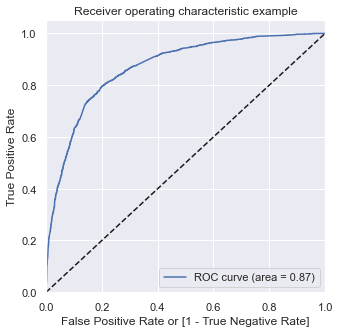

In [911]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

- We see that the area under curve is higher (0.87) which is good. Therefore, we can conclude that our Model is a good model.

#### Finding optimal cut-off point

- We will find the best cut-off point where both our sensitivity and specificity is well balanced.

In [912]:
# Creating columns with different cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.198346,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.003297,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.479136,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.847824,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.890052,7987,1,1,1,1,1,1,1,1,1,1,0


#### Calculating accuracy, sensitivity, specificity for different cut-offs

In [913]:
cutoff = pd.DataFrame( columns = ['prob','accu','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm_1))
    accu = (cm_1[0,0]+cm_1[1,1])/total1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cutoff.loc[i] =[ i ,accu,sensi,speci]
print(cutoff)

     prob      accu     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.580696  0.974244  0.334187
0.2   0.2  0.709495  0.924775  0.574648
0.3   0.3  0.779247  0.834015  0.744942
0.4   0.4  0.801449  0.762878  0.825608
0.5   0.5  0.797040  0.654947  0.886044
0.6   0.6  0.784128  0.577269  0.913700
0.7   0.7  0.761140  0.475470  0.940077
0.8   0.8  0.733585  0.361815  0.966453
0.9   0.9  0.688396  0.206051  0.990525


#### Plotting accuracy, sensitivity and specificity for different probability cut-offs

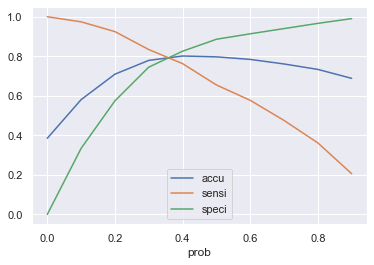

In [914]:
cutoff.plot.line(x='prob', y=['accu','sensi','speci'])
plt.show()

- From the graph above we can see that 0.36 is the optimum probability cut-off point

#### Calculating Final predicted

In [915]:
# calculating Final Predicted based on new found cut-off
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.198346,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.003297,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.479136,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.847824,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.890052,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Calculating Lead Score

In [916]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round(x*100))

In [917]:
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.198346,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.003297,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.479136,9226,0,1,1,1,1,1,0,0,0,0,0,1,48
3,1,0.847824,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.890052,7987,1,1,1,1,1,1,1,1,1,1,0,1,89


### Step 7: Model Evaluation

#### Checking Model accuracy

In [918]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7978271138403401

#### Confusion matrix

In [919]:
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion_1

array([[3116,  789],
       [ 495, 1951]], dtype=int64)

In [920]:
TP = confusion_1[1,1] # true positive 
TN = confusion_1[0,0] # true negatives
FP = confusion_1[0,1] # false positives
FN = confusion_1[1,0] # false negatives

#### Model sensitivity 

In [921]:
TP / float(TP+FN)

0.7976287816843827

#### Model specificity

In [922]:
TN / float(TN+FP)

0.7979513444302176

#### Positive predictive value

In [924]:
TP / float(TP+FP)

0.712043795620438

#### Negative predictive value

In [925]:
TN / float(TN+ FN)

0.8629188590418166

#### False positive rate

In [926]:
FP/ float(TN+FP)

0.20204865556978233

In [927]:
# Checking the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3116,  789],
       [ 495, 1951]], dtype=int64)

In [928]:
# Model Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.712043795620438

In [929]:
# Model Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7976287816843827

#### Calculation of Model Precision and Recall using sklearn

In [931]:
from sklearn.metrics import precision_score, recall_score

In [933]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.712043795620438

In [936]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7976287816843827

#### Precision - Recall curve

In [937]:
from sklearn.metrics import precision_recall_curve

In [938]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
P, R, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

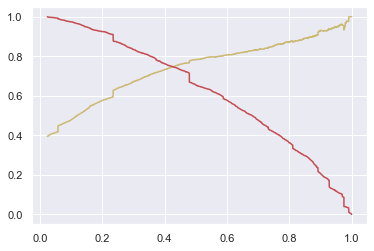

In [940]:
plt.plot(thresholds, P[:-1], "y-")
plt.plot(thresholds, R[:-1], "r-")
plt.show()

### Step 8: Prediction on Test data

In [941]:
# Scaling using standard Scaler
num_var=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_var] = scaler.fit_transform(X_test[num_var])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,0.304501,-0.591008,0.998931,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0.666261,1.894051,1.564920,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7936,-0.419021,-0.743117,-0.133048,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3830,1.751544,-0.578179,2.130909,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [943]:
# assigning the final columns selected by model to X_test
X_test = X_test[column1]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Media and Advertising,Specialization_Others,What is your current occupation_Student
3271,-0.591008,0.998931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,1.894051,1.564920,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,-0.743117,-0.133048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,-0.878732,-1.265027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3830,-0.578179,2.130909,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [944]:
# adding a constant
X_test_sm = sm.add_constant(X_test)

In [945]:
# prediction on test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.109862
1490    0.563155
7936    0.111155
4216    0.945656
3830    0.130540
1800    0.141649
6507    0.355322
4821    0.308753
4223    0.892291
4714    0.481884
dtype: float64

In [948]:
# converting y_test_pred into a df
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.109862
1490,0.563155
7936,0.111155
4216,0.945656
3830,0.130540


In [949]:
# converting y_test into a df
y_test_1 = pd.DataFrame(y_test)


In [950]:
# Adding Prospect ID as index
y_test_1['Prospect ID'] = y_test_1.index

In [952]:
# Removing index of both the df (y_pred_1 and y_test_1) and after that add them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

In [954]:
y_pred_final = pd.concat([y_test_1, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.109862
1,1,1490,0.563155
2,0,7936,0.111155
3,1,4216,0.945656
4,0,3830,0.130540


In [955]:
# Changing column name for more clarity
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob1'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob1
0,0,3271,0.109862
1,1,1490,0.563155
2,0,7936,0.111155
3,1,4216,0.945656
4,0,3830,0.130540


In [956]:
# adding lead_score column
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob1.map( lambda x: round(x*100))

In [957]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob1,Lead_Score
0,0,3271,0.109862,11
1,1,1490,0.563155,56
2,0,7936,0.111155,11
3,1,4216,0.945656,95
4,0,3830,0.130540,13


In [958]:
# adding Final_Predicted column
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob1.map(lambda x: 1 if x > 0.36 else 0)

In [959]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob1,Lead_Score,Final_Predicted
0,0,3271,0.109862,11,0
1,1,1490,0.563155,56,1
2,0,7936,0.111155,11,0
3,1,4216,0.945656,95,1
4,0,3830,0.130540,13,0


In [960]:
# re-arranging the columns 
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob1','Lead_Score','Final_Predicted']]

In [961]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob1,Lead_Score,Final_Predicted
0,3271,0,0.109862,11,0
1,1490,1,0.563155,56,1
2,7936,0,0.111155,11,0
3,4216,1,0.945656,95,1
4,3830,0,0.130540,13,0


#### Model accuracy

In [962]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7950789570326845

#### Confusion matrix

In [963]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion_2

array([[1386,  348],
       [ 210,  779]], dtype=int64)

In [965]:
TP = confusion_2[1,1]   # true positive 
TN = confusion_2[0,0]   # true negatives
FP = confusion_2[0,1]   # false positives
FN = confusion_2[1,0]   # false negatives

#### Model sensitivity

In [966]:
TP / float(TP+FN)

0.7876643073811931

#### Model specificity

In [967]:
TN / float(TN+FP)

0.7993079584775087

#### Precision

In [968]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

0.6912156166814551

#### Recall

In [970]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7876643073811931

### Comparing stats of Train and Test data

#### Train data
- accuracy: 79.78%
- sensitivity: 79.76%
- specificity: 79.79%

#### Test data
- accuracy: 79.51%
- sensitivity: 78.76%
- specificity: 79.93%

- We get a conversion rate of ~80% which is the initial target set by the CEO 
- The model seems to have worked well on the test data set and is able to predict the lead conversion rate.

#### Important feature variables of the model

In [979]:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website               5.502490
Lead Source_Reference                      3.064453
Last Activity_Had a Phone Conversation     2.306637
Total Time Spent on Website                1.118337
Last Activity_SMS Sent                     1.097311
Lead Source_Olark Chat                     0.877596
What is your current occupation_Student    0.303880
const                                      0.266130
Page Views Per Visit                      -0.161892
Lead Source_Direct Traffic                -0.337924
Specialization_Media and Advertising      -0.368326
Last Activity_Email Link Clicked          -0.484638
Last Activity_Page Visited on Website     -0.595170
Last Activity_Form Submitted on Website   -1.036709
Lead Origin_Landing Page Submission       -1.170745
Last Activity_Converted to Lead           -1.317131
Specialization_Others                     -1.535613
Last Activity_Olark Chat Conversation     -1.600550
Last Activity_Email Bounced               -2.354575
dtype: float

#### Finding 'Hot Leads' for the company

- 'Hot Leads' are the leads with high lead score. We can take a cut-off of 90 and above (arbitrary choice of cut-off). The higher the score, the better is the chances of conversion.

In [976]:
Hot_Leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=90]
Hot_Leads

,Prospect ID,Converted,Converted_prob1,Lead_Score,Final_Predicted
3,4216,1,0.945656,95,1
16,1946,1,0.905396,91,1
21,2461,1,0.989568,99,1
23,5822,1,0.974667,97,1
25,2684,1,0.974667,97,1
...,...,...,...,...,...
2659,5337,0,0.911643,91,1
2660,2347,1,0.904001,90,1
2666,4879,1,0.969382,97,1
2686,8052,1,0.974667,97,1


- With a cut-off of lead score >=90, we see that there are 195 leads whom the company can target for conversion.